# Machine Learning _ Assignment - 01
___

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1. Decision Tree Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

In [3]:
df= pd.read_csv('X:/Datasets/Assignment_Data.csv')
df = df.head(7)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35


In [4]:
from sklearn import tree
model= tree.DecisionTreeRegressor()

In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
model.fit(X,y)

DecisionTreeRegressor()

In [85]:
X_train,X_test,y_train,y_test=tts(X,y,train_size=0.70)

In [86]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
y_pred

array([-1.01753483,  0.73019194, -1.43911763, -0.69535435,  0.60447723,
        1.12604708,  0.60447723,  1.68796258, -1.1812563 ,  0.6483312 ,
       -0.69535435,  0.46999174, -1.01753483, -1.14675785,  1.64586277,
       -0.69535435, -1.07425262,  0.75533488,  1.43477901, -1.29001414,
       -0.93391993, -0.13285413,  1.29561576, -1.01753483, -0.29131313,
       -0.32581159,  0.6483312 , -0.43281527,  0.74597937,  0.6483312 ])

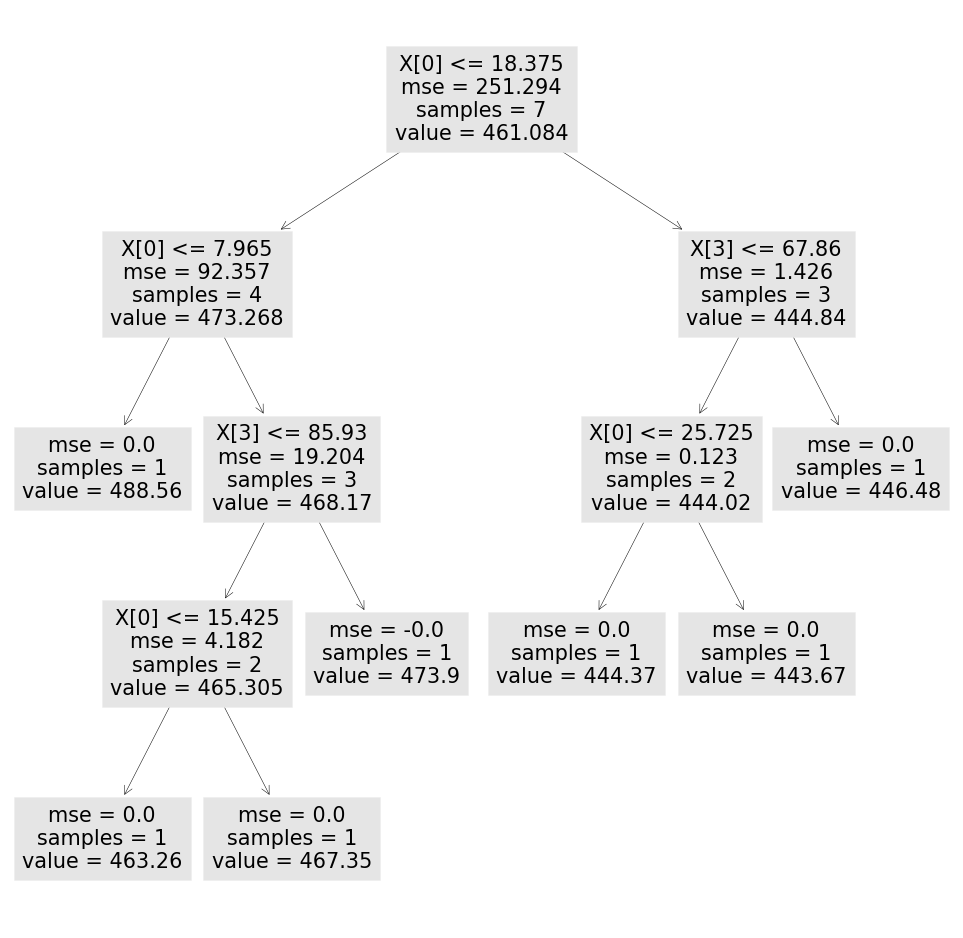

In [7]:
plt.figure(figsize=(17,17))
tree.plot_tree(model)
plt.show()

In [88]:
r2_score(y_test, y_pred)

0.8462748912160015

## 2. Random Forest Regression

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() 

In [90]:
df= pd.read_csv('X:/Datasets/Assignment_Data.csv')
df = df.head(500)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [91]:
X_train,X_test,y_train,y_test=tts(X,y,train_size=0.70)

In [92]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) 
y_pred

array([471.1237, 451.0262, 439.4478, 432.8051, 441.0194, 448.1261,
       463.4938, 461.9196, 452.6986, 466.229 , 443.6353, 466.4835,
       465.3385, 475.9267, 429.708 , 459.0877, 477.9081, 438.2595,
       432.097 , 439.9744, 466.6093, 444.2939, 450.8294, 472.1793,
       444.591 , 489.5768, 476.624 , 444.4254, 445.3907, 430.0438,
       443.9831, 443.3007, 463.2975, 479.8316, 444.9501, 448.6801,
       468.0338, 456.4262, 444.3918, 463.1233, 480.4472, 431.9452,
       476.6771, 452.4453, 447.1927, 464.4375, 432.458 , 479.6778,
       440.7956, 483.0768, 460.9314, 470.5185, 481.2762, 440.03  ,
       475.6162, 432.6231, 437.9921, 480.1941, 466.0118, 476.0344,
       467.4887, 430.1027, 441.8104, 469.5486, 433.2364, 450.1337,
       450.2408, 475.6738, 430.7824, 475.1997, 461.9296, 443.3796,
       444.2301, 482.7851, 444.0963, 460.958 , 452.5099, 437.8585,
       455.3744, 444.7046, 463.0855, 446.6063, 466.3999, 469.1833,
       441.3879, 442.5838, 477.4319, 463.3172, 433.2058, 443.9

In [93]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

MAE:  3.4746753333333293
MSE:  19.856587799400028


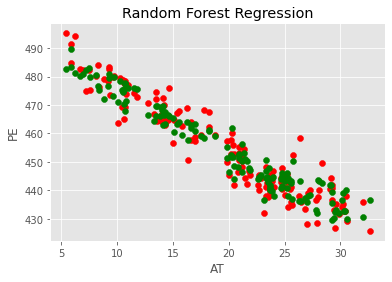

In [94]:
plt.scatter(X_test['AT'].values, y_test, color = 'red')
plt.scatter(X_test['AT'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show() 

In [95]:
r2_score(y_test, y_pred)

0.9306725795607328

## 3. Multiple Linear Regression

In [96]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=101)

In [97]:
mlr = LR()
mlr.fit(X_train,y_train)

LinearRegression()

In [98]:
print('Coefficients: \n', mlr.coef_)

Coefficients: 
 [-2.02583216 -0.21725999  0.0374248  -0.17017118]


In [99]:
predictions = mlr.predict(X_test)

r2_score(y_test, predictions)

0.9253509247615204

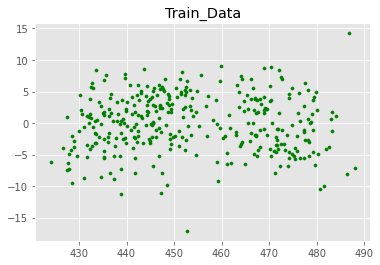

In [100]:
plt.title('Train_Data')
plt.scatter(mlr.predict(X_train), mlr.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.show()

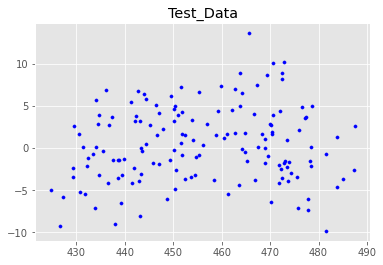

In [101]:
plt.title('Test_Data')
plt.scatter(mlr.predict(X_test), mlr.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')
plt.show()

Text(0, 0.5, 'Predicted Y')

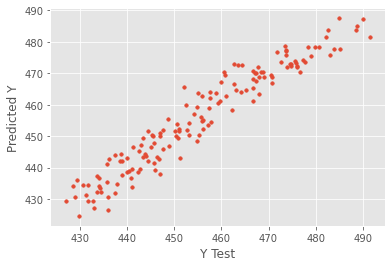

In [102]:
plt.scatter(y_test,predictions,s=13)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## 4. Polynomial Linear Regression

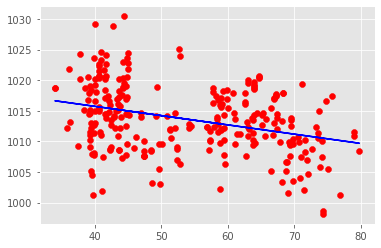

In [117]:
dataset = pd.read_csv('X:\Datasets\Assignment_Data.csv')
dataset = dataset.head(275)
 
X = dataset.iloc[:,1:2].values  
y = dataset.iloc[:,2].values
 
# fitting the linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
 
# visualising the linear regression model
plt.scatter(X,y, color='red')
plt.plot(X, reg.predict(X),color='blue')
plt.show()

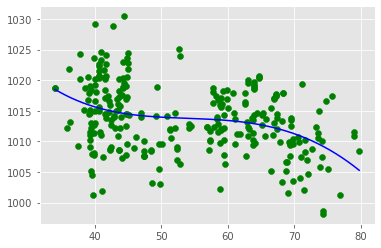

In [118]:
# visualising polynomial regression
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
 
poly_reg.fit(X_poly, y)
    
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)


  
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

plt.scatter(X,y, color='green')   
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)),color='blue') 
plt.show()

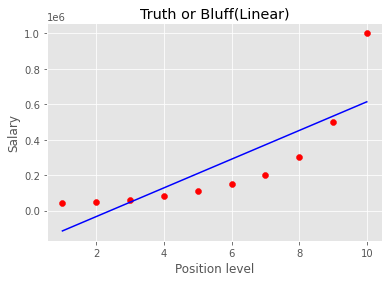

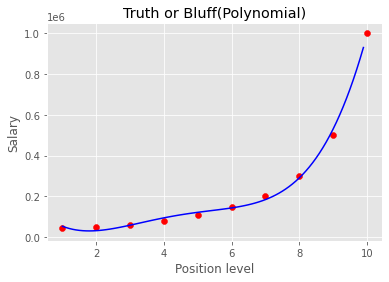

In [119]:
dataset = pd.read_csv('X:\Datasets\Position_Salaries.csv')
dataset
 
X = dataset.iloc[:,1:2].values  
y = dataset.iloc[:,2].values
 
# fitting the linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
 
# visualising the linear regression model
plt.scatter(X,y, color='red')
plt.plot(X, reg.predict(X),color='blue')
plt.title("Truth or Bluff(Linear)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

 
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
  
# visualising polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
  
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

plt.scatter(X,y, color='red')  
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)),color='blue')  
plt.title("Truth or Bluff(Polynomial)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [120]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=101)

In [122]:
# poly_reg.fit(X_train, y_train)
# y_pred = poly_reg.predict(X_test) 
# y_pred

In [123]:
#r2_score(y_test,y_pred)

## 5. Support Vector Regression

In [107]:
from sklearn.svm import SVR
import seaborn as sns

In [108]:
df= pd.read_csv('X:/Datasets/Assignment_Data.csv')
df = df.head(100)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
95,20.02,67.32,1012.05,76.34,445.31
96,10.08,40.72,1022.70,67.30,480.80
97,27.23,66.48,1005.23,52.38,432.55
98,23.37,63.77,1013.42,76.44,443.86


In [109]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [110]:
y=y.reshape(-1,1)

In [111]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [112]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.4, random_state=101)

In [113]:
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [114]:
y_pred=svr.predict(X_test)
y_pred

array([ 0.4863626 , -0.68988281,  0.96347476,  1.13627262, -0.73075426,
        1.59189128, -0.8560761 ,  0.83359076,  0.50760656,  0.81686606,
        0.42083931, -1.19548723, -0.44419999,  1.22282874,  0.25736131,
       -0.80689453, -1.06442373, -1.16956899, -0.43953589,  0.82306839,
       -1.03138609, -0.28783942,  0.80238398,  1.21606701,  1.38285882,
       -0.78637058, -0.74082715, -0.83572704, -1.10123907, -0.99574239,
        0.74618584, -1.08306102, -0.8890685 ,  0.6304162 ,  1.23341179,
        0.66002871,  1.03481269,  0.00162136, -0.92718955, -0.52932917])

In [115]:
r2_score(y_test, y_pred)

0.8791932047111527